In [3]:
series = None
with open("data.txt", "r") as file:
    series = list(map(float, file.read().split(",")))

In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

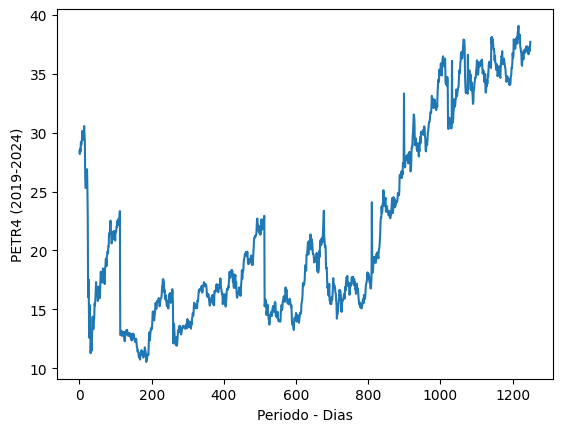

In [7]:
x = list(range(len(series)))
y = list(reversed(series))

plt.plot(x,y)
plt.xlabel("Periodo - Dias")
plt.ylabel("PETR4 (2019-2024)")
plt.savefig("series.png")
plt.show()

In [8]:
def media_movel(serie):
    medias = []

    for i,v in enumerate(serie):
        if i == 0:
            m = v
        else:
            m = m + (v - m)/(i+2)
        medias.append(m)
    return medias

In [9]:
medias = media_movel(y)

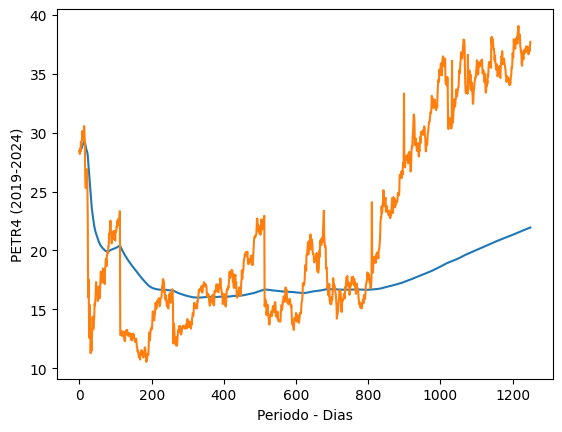

In [10]:
plt.plot(x,medias)
plt.plot(x,y)
plt.xlabel("Periodo - Dias")
plt.ylabel("PETR4 (2019-2024)")
plt.savefig("medias.png")
plt.show()

In [11]:
class Agente:
    def __init__(self, estado=None, funcaoAgente=None):
        if funcaoAgente == None:
            def funcaoAgente(*entradas):
                return "AAAKK"
        self.estado = estado
        self.funcaoAgente = funcaoAgente
        self.historicoPercepcoes = []

    def percepcao(self):
        entrada = input("entre com um dado: ")
        self.historicoPercepcoes.append(entrada)

    def saida(self):
        return self.funcaoAgente(self.historicoPercepcoes)

In [12]:
class Ambiente:
    def __init__(self, estadoInicial=None):
        self.estado = estadoInicial
        self.objetosNoAmbiente = []
        self.agentes = []

    def percepcao(self, agente):
        return None

    def adicionarAgente(self, agente):
        self.agentes.append(agente)

    def adicionarObjeto(self, objeto):
        self.objetosNoAmbiente.append(objeto)

In [13]:
def funcaoAgenteCompraAcao(media, cotacao):
    if cotacao >= media:
        return False, cotacao, media
    else:
        return True, cotacao, media

In [14]:
class AgenteNegociador(Agente):
    def __init__(self, estadoInicial=None, funcaoAgente=None):
        super().__init__(estadoInicial, funcaoAgente)
        self.observacoes = 0
        self.mediaAtual = 0
        self.medias = []

    def atualizaEstado(self, cotacao):
        self.observacoes += 1
        if self.observacoes == 1:
            self.mediaAtual = cotacao
        else:
            # media movel
            self.mediaAtual = self.mediaAtual + (cotacao - self.mediaAtual)/(self.observacoes + 1)

        self.estado.append(cotacao)
        self.medias.append(self.mediaAtual)

    def percepcao(self,valor):
        self.atualizaEstado(valor)

    def saida(self):
        return self.funcaoAgente(self.medias[-1], self.estado[-1])

In [15]:
agente = AgenteNegociador([], funcaoAgenteCompraAcao)
for i in y[:20]:
    agente.percepcao(i)
    print(agente.saida())

(False, 28.45, 28.45)
(True, 28.18, 28.36)
(False, 28.63, 28.4275)
(True, 28.39, 28.419999999999998)
(False, 29.18, 28.546666666666667)
(False, 28.93, 28.60142857142857)
(False, 29.13, 28.6675)
(False, 29.48, 28.75777777777778)
(False, 30.13, 28.895)
(False, 29.72, 28.97)
(False, 29.42, 29.0075)
(False, 29.36, 29.034615384615385)
(False, 29.75, 29.085714285714285)
(False, 30.55, 29.183333333333334)
(False, 29.92, 29.229375)
(True, 29.14, 29.224117647058826)
(True, 26.21, 29.05666666666667)
(True, 25.3, 28.858947368421056)
(True, 25.34, 28.683000000000003)
(True, 26.53, 28.580476190476194)


In [16]:
class AgenteNegociadorDesempenho(AgenteNegociador):
    def __init__(self, estadoInicial=None, funcaoAgente=None, saldoR=0, saldoA=0):
        super().__init__(estadoInicial, funcaoAgente)
        self.saldoReal = saldoR
        self.saldoAcao = saldoA
        self.evolucaoReal = []
        self.evolucaoAcao = []


    def comprar(self):
        if self.saldoReal > 0:
            self.saldoAcao += self.saldoReal/self.estado[-1]
            self.saldoReal = 0
            self.evolucaoAcao.append(self.saldoAcao)

    def vender(self):
        if self.saldoAcao > 0:
            self.saldoReal += self.saldoAcao*self.estado[-1]
            self.saldoAcao = 0
        self.evolucaoReal.append(self.saldoReal)

    def desempenho(self):
        return self.evolucaoReal[-1] - self.evolucaoReal[0]

In [17]:
class AmbienteFinanceiro(Ambiente):
    def __init__(self, estadoInicial):
        super().__init__(estadoInicial)

    def percepcao(self, agente):
        for i in self.estadp:
            for ag in self.agentes:
                ag.percebe(i)
    
    def executaAmbiente(self):
        for gst in self.estado:
            for ag in self.agentes:
                ag.atualizaEstado(gst)
                acaoCOmpra = ag.saida()
                if acaoCOmpra[0]:
                    ag.comprar()
                else:
                    ag.vender()

    def desempenhoAgente(self):
        desempenho = []
        for i,ag in enumerate(self.agentes):
            desempenho.append((i, ag.desempenho()))
        return desempenho

In [19]:
ag = AgenteNegociadorDesempenho([], funcaoAgenteCompraAcao, 100, 0)
ag2 = AgenteNegociadorDesempenho([], funcaoAgenteCompraAcao, 9382134, 0)
am = AmbienteFinanceiro(y)
am.adicionarAgente(ag)
am.adicionarAgente(ag2)
am.executaAmbiente()
desempenho = am.desempenhoAgente()
print(f"Desempenho: {desempenho}")


Desempenho: [(0, 99.3049025549598), (1, 9316919.026275743)]
